In [1]:
library(lme4) #random effect
library(lattice) 
library(lme4) #glm
library(DHARMa) #simulating residuals
library(glmmTMB) #beta regression with mixed effects

Loading required package: Matrix

This is DHARMa 0.3.3.0. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa') Note: Syntax of plotResiduals has changed in 0.3.0, see ?plotResiduals for details

Warning message:
"package 'glmmTMB' was built under R version 4.0.4"


# Weather

In [2]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/CleaningAnalysis_/Cleaning/Raw&Cleaned'
df = read.csv(file.path(path_,'environmentalfactorestimatederrorrate.csv'), header = TRUE, sep = ";")
df$hour = as.integer(df$hour)   
df$PenID = as.factor(df$PenID) 
df$system = as.factor(df$system) 
df$humidity_avgpercent_tr = df$humidity_avgpercent/10
print(dim(df))
summary(df)

[1] 2614   12


 Timestamp_weather      PenID          hour           system   
 Length:2614        pen8   :336   Min.   :10.00   10 - 12:997  
 Class :character   pen9   :336   1st Qu.:11.00   3 - 5  :945  
 Mode  :character   pen12  :334   Median :13.00   8 - 9  :672  
                    pen10  :332   Mean   :12.52                
                    pen11  :331   3rd Qu.:14.00                
                    pen4   :321   Max.   :15.00                
                    (Other):624                                
  prediction        temperature_C    humidity_avgpercent      IFR        
 Length:2614        Min.   :-6.000   Min.   : 49.00      Min.   : 0.000  
 Class :character   1st Qu.: 1.000   1st Qu.: 72.00      1st Qu.: 0.000  
 Mode  :character   Median : 2.000   Median : 84.00      Median : 1.000  
                    Mean   : 3.062   Mean   : 83.22      Mean   : 2.083  
                    3rd Qu.: 5.000   3rd Qu.: 97.00      3rd Qu.: 2.000  
                    Max.   :14.000   Max.   

In [3]:
#Generalized linear mixed effect model
fit = glmer(cbind(IFR,nbr.registrations) ~ humidity_avgpercent_tr + temperature_C + hour + estimated.transitions + (1|system/PenID), 
            family=binomial, data=df)
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
cbind(IFR, nbr.registrations) ~ humidity_avgpercent_tr + temperature_C +  
    hour + estimated.transitions + (1 | system/PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  5785.8   5826.9  -2885.9   5771.8     2607 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8552 -0.7100 -0.3554  0.4353  3.4133 

Random effects:
 Groups       Name        Variance Std.Dev.
 PenID:system (Intercept) 0.04013  0.2003  
 system       (Intercept) 0.63220  0.7951  
Number of obs: 2614, groups:  PenID:system, 8; system, 3

Fixed effects:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -1.148191   0.497048  -2.310  0.02089 *  
humidity_avgpercent_tr -0.036717   0.011786  -3.115  0.00184 ** 
temperature_C          -0.017352   0.004208  -4.123 3.73e-05 ***
hour                   -0.011244   0.009900  -1.1

DHARMa:plot used testOutliers with type = binomial for computational reasons (nObs > 500). Note that this method may not have inflated Type I error rates for integer-valued distributions. To get a more exact result, it is recommended to re-run testOutliers with type = 'bootstrap'. See ?testOutliers for details



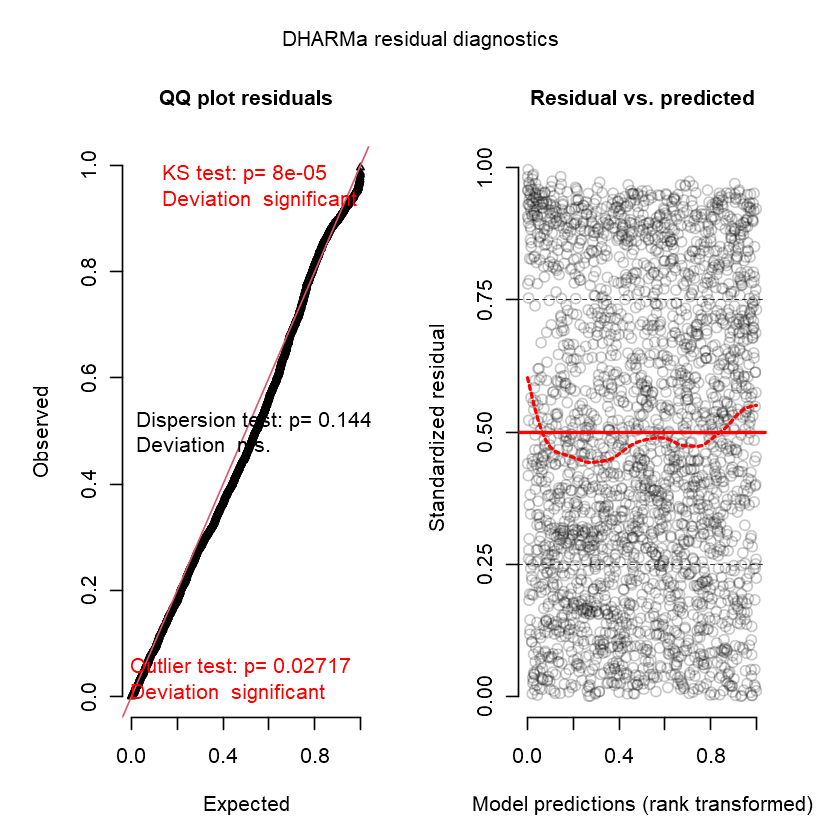

In [4]:
#https://cran.r-project.org/web/packages/glmmTMB/vignettes/model_evaluation.pdf
library(DHARMa)
res <- simulateResiduals(fit)
plot(res)

# Estimated number of transitions

In [5]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/CleaningAnalysis_/Cleaning/Raw&Cleaned'
df = read.csv(file.path(path_,'estimatednumbertransitionsestimatederrorrate.csv'), header = TRUE, sep = ";")
df$HenID = as.factor(df$HenID) 
df$PenID = as.factor(df$PenID) 
df$system = as.factor(df$system) 
df$level = as.factor(df$level) 
#6h of WG open
df$Estimated_number_transition_perhour = df$Estimated_number_transition/6
print(dim(df))
summary(df)

[1] 7485   11


     HenID          PenID          system            level     
 hen_1  :  56   pen4   : 972   10 - 12:2863   2020-11-14: 138  
 hen_10 :  56   pen3   : 965   3 - 5  :2839   2020-11-24: 138  
 hen_105:  56   pen10  : 959   8 - 9  :1783   2021-01-10: 138  
 hen_106:  56   pen9   : 955                  2021-01-11: 138  
 hen_108:  56   pen11  : 953                  2020-11-15: 137  
 hen_111:  56   pen12  : 951                  2020-11-16: 137  
 (Other):7149   (Other):1730                  (Other)   :6659  
  prediction             IFR         nbr.registrations      EER          
 Length:7485        Min.   : 0.000   Min.   :  1.00    Min.   :0.000000  
 Class :character   1st Qu.: 1.000   1st Qu.: 48.00    1st Qu.:0.005814  
 Mode  :character   Median : 2.000   Median : 76.00    Median :0.031746  
                    Mean   : 3.719   Mean   : 77.75    Mean   :0.051831  
                    3rd Qu.: 5.000   3rd Qu.:102.00    3rd Qu.:0.075676  
                    Max.   :51.000   Max.   

In [6]:
#Generalized linear mixed effect model
fit = glmer(cbind(IFR,nbr.registrations) ~ Estimated_number_transition_perhour + (1|system/PenID/HenID) + (1|level), 
            family=binomial, data=df)
summary(fit)

boundary (singular) fit: see ?isSingular



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(IFR, nbr.registrations) ~ Estimated_number_transition_perhour +  
    (1 | system/PenID/HenID) + (1 | level)
   Data: df

     AIC      BIC   logLik deviance df.resid 
 32582.5  32624.0 -16285.2  32570.5     7479 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8779 -0.9539 -0.3747  0.6444 13.5009 

Random effects:
 Groups               Name        Variance  Std.Dev. 
 HenID:(PenID:system) (Intercept) 4.271e-01 6.535e-01
 level                (Intercept) 2.135e-02 1.461e-01
 PenID:system         (Intercept) 4.761e-01 6.900e-01
 system               (Intercept) 4.735e-10 2.176e-05
Number of obs: 7485, groups:  
HenID:(PenID:system), 140; level, 56; PenID:system, 8; system, 3

Fixed effects:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -3.023994   0.252169  -11.99   <2

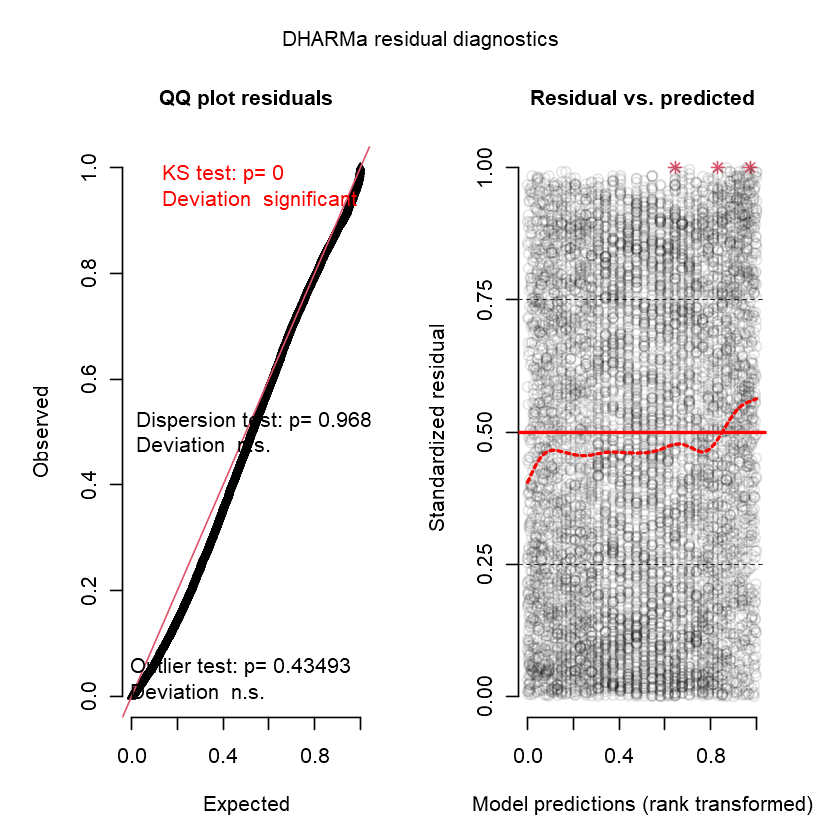

In [7]:
#https://cran.r-project.org/web/packages/glmmTMB/vignettes/model_evaluation.pdf
library(DHARMa)
res <- simulateResiduals(fit)
plot(res)